# Polynomial-Linear-Regression in Python

## Step 1: Data processing

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:,1:2].values
y = dataset.iloc[:,-1].values
print("X: \n", X)
print("\ny: \n", X)


X: 
 [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]

y: 
 [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


## Step 2: Create a linear regression model and polynomial regression model. Then, compare.

###### 1. Fitting Linear Regression to the dataset

In [2]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

###### 2. Fitting Polynomial Regression to the dataset

In [3]:
from sklearn.preprocessing import PolynomialFeatures
#first try degree = 2, then after obtaining graph later,
#increment the degree and see if if the curve gets more precise
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
print("X_poly:", X_poly)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

X_poly: [[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Step 3: Visualising the results 

###### 1. Visualising the Linear Regression results

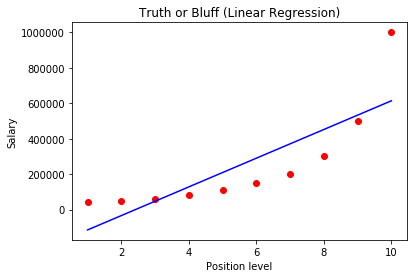

In [4]:
plt.scatter(X ,y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

###### 2. Visualising the Polynomial Regression results

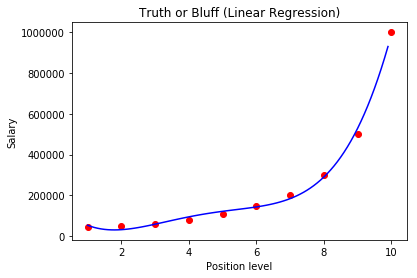

In [5]:
X_grid = np.arange(min(X) , max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, lin_reg_2.predict( poly_reg.fit_transform(X_grid)), color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Step 4: Predict bluff or truth

##### 1. Predicting a new result with Linear Regression

In [6]:
#using linear regression, not relevant
print(lin_reg.predict([[6.5]]))

[330378.78787879]


##### 1. Predicting a new result with Polynomial Regression

In [7]:
print(lin_reg_2.predict( poly_reg.fit_transform([[6.5]])))

[158862.45265152]
